# Finding the onset of the Plantation Phase


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display, clear_output
set_matplotlib_formats('svg', 'pdf')
import vapeplot
import pandas as pd
import seaborn as sns

In [2]:
time_steps = np.loadtxt('Input/Time.txt', dtype=int)
all_days = np.cumsum(time_steps)
days_with_slaves = all_days[11:]
demographics = np.loadtxt('Input/Demography.txt', dtype=int)
cum_demo = np.cumsum(demographics, axis=0)
slave_demo = cum_demo[11:]

## Changes in the demographics over time

In [3]:
europeans = np.transpose(cum_demo)[0]
slaves = np.sum(np.transpose(cum_demo)[1:], axis=0)

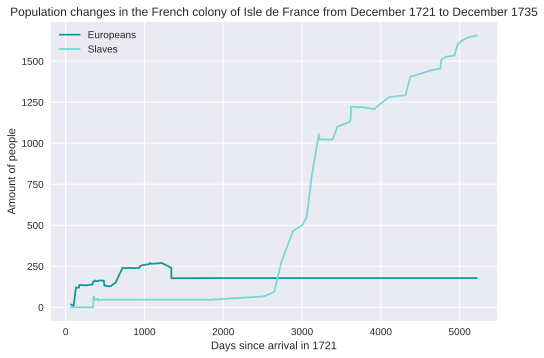

In [13]:
title = 'Population changes in the French colony of Isle de France from August 1715 to December 1735'
plt.title(title)
plt.xlabel('Days since arrival in 1721')
plt.ylabel('Amount of people')

palette = sns.blend_palette(vapeplot.palette('macplus'))

plt.plot(all_days, europeans, color=palette[1], label='Europeans')
plt.plot(all_days, slaves, color=palette[2], label='Slaves')
plt.legend()
#plt.show()

plt.savefig(f'{title}.png')

## The ratio of slaves to European colonists

In [5]:
def slave_settler_ratios(days, demographics): 
    ratios = []
    for i, epoch in enumerate(days):
        pop = demographics[i, :]
        europeans = pop[0]
        slaves = sum(pop[1:])
        ratio = slaves/europeans
        ratios.append((epoch, ratio))
    return ratios
    

In [6]:
all_ratios = slave_settler_ratios(days_with_slaves, slave_demo)
days, ratios = map(list, zip(*all_ratios))

In [7]:
def certain_ratio(criteria, days_ratios):
    ''' Returns the earliest day where the ratio of slaves to settlers exceeds given criteria'''
    for day, ratio in days_ratios:
        if ratio > criteria:
            return day

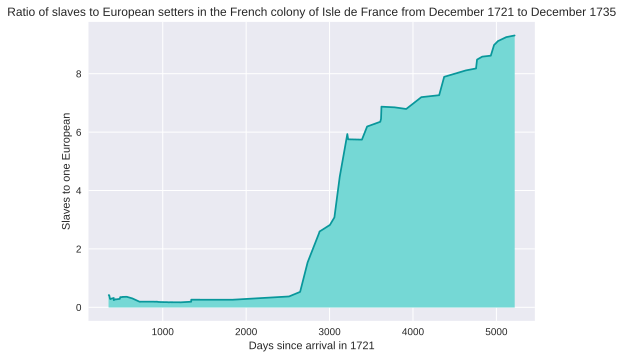

In [12]:
title = 'Ratio of slaves to European setters in the French colony of Isle de France from December 1721 to December 1735'
plt.title(title)
plt.xlabel('Days since arrival in 1721')
plt.ylabel('Slaves to one European')

palette = sns.blend_palette(vapeplot.palette('macplus'))

plt.plot(days, ratios, color=palette[1])
plt.fill_between(days, ratios, color=palette[2])
#plt.show()

plt.savefig(f'{title}.png')

In [9]:
for i in range(10):
    day = certain_ratio(i, all_ratios)
    print (f'{i} slaves per European exceeded on day {day}')

0 slaves per European exceeded on day 353
1 slaves per European exceeded on day 2737
2 slaves per European exceeded on day 2874
3 slaves per European exceeded on day 3058
4 slaves per European exceeded on day 3122
5 slaves per European exceeded on day 3213
6 slaves per European exceeded on day 3450
7 slaves per European exceeded on day 4100
8 slaves per European exceeded on day 4633
9 slaves per European exceeded on day 5019


## Conclusions

The demographic data shows a sudden upswing in the slave population about 2737 days after the founding of the colony. Within two years the slave population went from being smaller than the European population to outnumbering it 6 to 1. This rapid and massive influx of slaves marks the onset of Chaundenson's (2001) plantation phase. During this phase incoming slaves had less contact with the European settlers, instead communicating amongst themselves and the established slaves. According to both Chaundenson (2001) and Mufwene (1996 and other works) it is this lack of access to the language of the Europeans that lead the local vernacular to diverge from it. 

To incorporate this phase into the model, three possible start points for the Plantation phase were selected from the list above. They are day 2874, day 3058, and day 3122, where the slaves outnumbered the colonists 2:1, 3:1, and 4:1 respectively.  Before these points, during the Homestead phase, all slave agents are assigned the Mixed role in the model. Starting from these points all incoming slave agents are assigned the Black role in the model so that they have less interaction with the European agents. 